# Breast Cancer Prediction

## 

### Importation des librairies

In [2]:
# importation des libraires de visualisation et de traitement
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
import seaborn as sns
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import  Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.metrics import Precision, Recall, CategoricalAccuracy

In [3]:
benign_dir = './data/train/benign'
malignant_dir = './data/train/malignant'
normal_dir = './data/train/normal'
train_path = "./data/train"


### Random sample visualisation

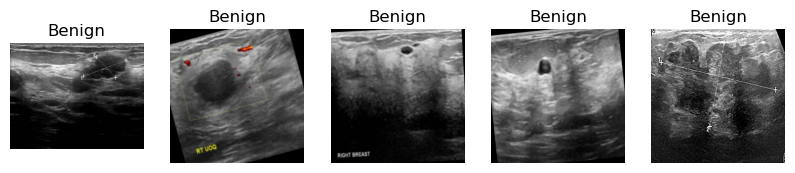

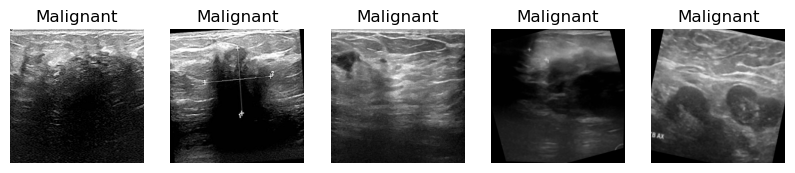

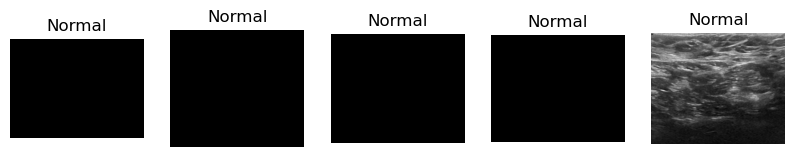

In [4]:


# Fonction pour afficher un nombre fixé de images pour chaque classe
def show(directory, label, num_images=5):
     # Lister tous les fichiers dans le dossier
    all_files = os.listdir(directory)
    
    # Selectionner aleatoirement `num_images` fichiers dans le dossier
    random_files = random.sample(all_files, min(num_images, len(all_files)))

    plt.figure(figsize=(10, 5))
    
    for i, filename in enumerate(random_files):
        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR à RGB
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    
    plt.show()

# Show
show(benign_dir, 'Benign')
show(malignant_dir, 'Malignant')
show(normal_dir, 'Normal')


In [5]:
def preprocess(img_path, image_size):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (image_size, image_size))  # Redimensionner l'image à la taille désirée
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR à RGB
    img = img / 255.0  # Normaliser les pixels entre 0 et 1
    return img

In [6]:
def load_data():
    
    X = []
    Y = []
    image_size = 150  # Taille de l'image apres redimensionnement
    
    # Charger des images et des étiquettes
    for class_label in os.listdir(train_path):
        folder_path = os.path.join(train_path, class_label)
        
        # Vérifiez si le chemin est un répertoire
        if os.path.isdir(folder_path):
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Vérifiez les types de fichiers image valides
                    img = preprocess(img_path, image_size)
                    X.append(img)
                    Y.append(class_label)
    
    return np.array(X), np.array(Y)


In [7]:
# Chargement des données
X, Y = load_data()


### Verification of corrupted images

In [8]:
def is_image_valid(img_path):
    try:
        img = cv2.imread(img_path)
        if img is None or img.size == 0:
            return False
        return True
    except:
        return False
 
invalid_images = []

# Parcourez les étiquettes de classe
for class_label in os.listdir(train_path):
    folder_path = os.path.join(train_path, class_label)
    
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            # Vérifiez si l'image est valide
            if not is_image_valid(img_path):
                invalid_images.append(img_path)

print("Images invalides :", invalid_images)

Images invalides : []


In [9]:
# Affichage de la forme des données chargées
print("")

print("***********************************************")

print("Dimensions des images :", X.shape)
print("Nombre total d'images :", X.shape[0])
print("")

print("Valeur minimale des pixels :", X.min())
print("Valeur maximale des pixels :", X.max())
print("")
print("***********************************************")
print("")
# Distribution des classes
distribution = Counter(Y)
print("Distribution des classes :", distribution)


***********************************************
image shape : (9706, 150, 150, 3)
total number of images : 9706

min value of pixels : 0.0
max value of pixels : 1.0

***********************************************

class distribution : Counter({'benign': 4977, 'malignant': 4463, 'normal': 266})


### Random sample visualisation after data loading

In [1]:
def visualize_random_samples(X, Y, num_images=5):
    plt.figure(figsize=(10, 5))
    random_indices = np.random.choice(len(X), num_images, replace=False)
    
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X[idx])
        plt.title(Y[idx])
        plt.axis('off')
    plt.show()

visualize_random_samples(X, Y)


NameError: name 'X' is not defined

#### Label Encodaging

In [11]:
# Encodage des étiquettes
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

print("Mapping des étiquettes :", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

[1 1 1 ... 2 2 2]
[1 1 1 ... 2 2 2]
Mapping des étiquettes : {'benign': 0, 'malignant': 1, 'normal': 2}


### Splitting the dataset

In [12]:
print(f"Dimensions de X: {X.shape}")
print(f"Dimensions de Y_encoded: {Y_encoded.shape}")


Dimensions de X: (9706, 150, 150, 3)
Dimensions de Y_encoded: (9706,)


In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

### Creation of the CNN architecture

In [14]:
from keras.regularizers import l2

model = Sequential()

# Couche de convolution

# Première couche Convolutionnelle
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Deuxième couche Convolutionnelle
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Troisième convoluionnelle
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Aplatir la sortie de convolution avant les couches entièrement connectées
model.add(Flatten())

# Couche Entièrement connectées
model.add(Dense(512, activation="relu", kernel_regularizer=l2(0.01)))
# model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
# Couche de sortie avec 3 classes (benign, malignant, normal)

model.add(Dense(3, activation="softmax"))

### Performance Evaluation

In [15]:
# Compiler le modèle
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0011)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
from keras.callbacks import EarlyStopping

# Configurer EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # Surveiller la perte de validation
                               patience=3,          # Nombre d'époques sans amélioration avant l'arrêt
                               restore_best_weights=True)  # Restaurer les poids du meilleur modèle

# Entraînement du modèle avec EarlyStopping
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=8,
    epochs=10,
    callbacks=[early_stopping] 
)


Epoch 1/10


2024-10-28 15:26:58.848731: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


971/971 [==============================] - 78s 79ms/step - loss: 0.8992 - accuracy: 0.6841 - val_loss: 0.7358 - val_accuracy: 0.7739
Epoch 2/10
971/971 [==============================] - 77s 79ms/step - loss: 0.6877 - accuracy: 0.7749 - val_loss: 0.6195 - val_accuracy: 0.8162
Epoch 3/10
971/971 [==============================] - 78s 80ms/step - loss: 0.6162 - accuracy: 0.8112 - val_loss: 0.5511 - val_accuracy: 0.8517
Epoch 4/10
971/971 [==============================] - 76s 79ms/step - loss: 0.5684 - accuracy: 0.8350 - val_loss: 0.5308 - val_accuracy: 0.8620
Epoch 5/10
971/971 [==============================] - 75s 77ms/step - loss: 0.5349 - accuracy: 0.8609 - val_loss: 0.5032 - val_accuracy: 0.8759
Epoch 6/10
971/971 [==============================] - 78s 80ms/step - loss: 0.5080 - accuracy: 0.8764 - val_loss: 0.4651 - val_accuracy: 0.8841
Epoch 7/10
971/971 [==============================] - 79s 81ms/step - loss: 0.4715 - accuracy: 0.8888 - val_loss: 0.4760 - val_accuracy: 0.8862
Epo

In [17]:
loss, accuracy = model.evaluate(X_val, Y_val)
print(f"Loss: {loss}, Accuracy: {accuracy}")


61/61 [==============================] - 4s 66ms/step - loss: 0.4310 - accuracy: 0.9202
Loss: 0.4309661090373993, Accuracy: 0.920185387134552


In [21]:
# Save the model
model.save('model_breast_cancer.keras')

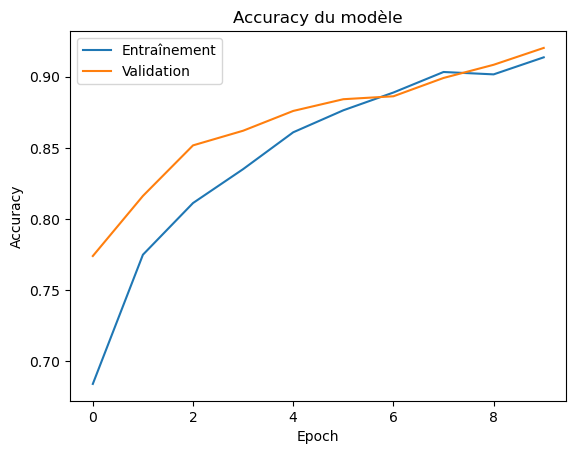

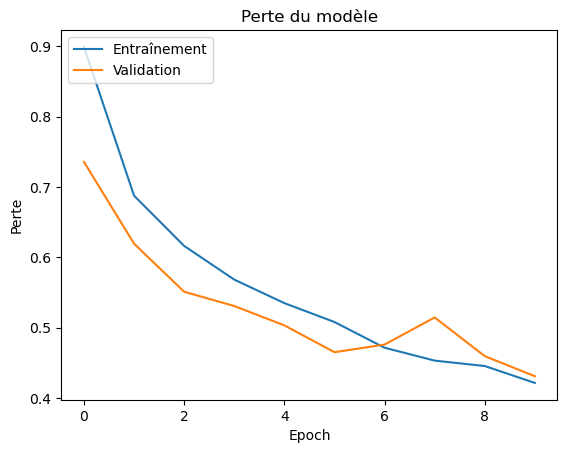

In [19]:
import matplotlib.pyplot as plt

# Résumé de l'historique d'entraînement pour l'accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy du modèle')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()

# Résumé de l'historique d'entraînement pour la perte
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte du modèle')
plt.ylabel('Perte')
plt.xlabel('Epoch')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()
